<a href="https://colab.research.google.com/github/maeve70/SentimentAnalysis/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I had started to use an IFTTT applet back in 2017 to track the tweets of 3 twitter accounts: @realDonaldTrump , @POTUS, @PressSec (if you didn't know, Dan Scavino, former WH Deputy Chief of Staff,  was behind the Potus account.) because I wanted to see frequency of tweets, how many tweets based on certain words contained in the tweets etc. 

The applet (not created by me) tracked the accounts and put the tweets, and a link to the tweets into a Google Sheet. I had a couple data vizzes in Tableau:
Here from 4/1/2017 - 8/1/2019:

https://public.tableau.com/app/profile/lisa3690/viz/Twitter_39/Dashboard1

and this one is just his tweets from 12/2017 - 2/1/2021

https://public.tableau.com/app/profile/lisa3690/viz/DrumpfTweets12-17-PresentDay/FrequencybySubjectMonth

The spreadsheet does include links to the tweets, however, since a certain someone is no longer on Twitter, you cannot see them. And, the other two accounts have been replaced by the current Biden administration personnel.
The csv file is a historical record of the tweets at those timeframes. The dates for this data set of tweets is 3/14/2017 - 8/10/2018.

I wanted to try out Vader. What is below is me learning how to use Vader to analyze the sentiments of the tweets. I'm not sure what I'll find. It's all a learning process! :)

Vader: Valence Aware Dictionary for Sentiment Reasoning



In [ ]:
#pip install vaderSentiment

In [1]:
import pandas as pd
import seaborn as sns;
from matplotlib import pyplot as plt
import numpy as np
import nltk
import nltk.corpus
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Sentiment Intensity Analyzer, sid classifies a string into 1 of 4 categories:
- negative
- neutral
- positive
- compound (computed by normalizing the scores above)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


It's actually easier to uplodad the csv to GH and grab it from there, rather than mounting the notebook to GDrive.

https://docs.gspread.org/en/v5.6.2/

Use the code in the 2 cells below if importing/connecting to a gsheet file.

In [ ]:
#@title unused code
'''from google.colab import auth
import gspread
from google.auth import default

#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)'''

In [ ]:
#@title more unused code using gspread
'''
#defining my worksheet
worksheet = gc.open('Mastersheet').sheet1
#get_all_values gives a list of rows
rows = worksheet.get_all_values()
#Convert to a DataFrame 
df = pd.DataFrame(rows)'''

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/maeve70/csvfiles/main/Mastersheet%20-%20orig.csv')

In [3]:
df.head()

,User,Tweets,Link to Tweet,Date/Time
0,@realDonaldTrump,"JOBS, JOBS, JOBS! https://t.co/wAkQMKdPXA",http://twitter.com/realDonaldTrump/status/8416...,"March 14, 2017 at 11:00AM"
1,@realDonaldTrump,Great optimism in America – and the results wi...,http://twitter.com/realDonaldTrump/status/8416...,"March 14, 2017 at 12:12PM"
2,@realDonaldTrump,"Does anybody really believe that a reporter, w...",http://twitter.com/realDonaldTrump/status/8419...,"March 15, 2017 at 06:55AM"
3,@realDonaldTrump,Can you imagine what the outcry would be if @S...,http://twitter.com/realDonaldTrump/status/8419...,"March 15, 2017 at 07:02AM"
4,@realDonaldTrump,"Will be going to Detroit, Michigan (love), tod...",http://twitter.com/realDonaldTrump/status/8419...,"March 15, 2017 at 07:13AM"


need to get rid of the double indexes on the columns. This is used if importing from GDrive only.

In [ ]:
#df.columns = df.iloc[0]
#df = df.iloc[1:]

In [4]:
df.isnull().sum()

User             0
Tweets           0
Link to Tweet    0
Date/Time        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5997 entries, 0 to 5996
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User           5997 non-null   object
 1   Tweets         5997 non-null   object
 2   Link to Tweet  5997 non-null   object
 3   Date/Time      5997 non-null   object
dtypes: object(4)
memory usage: 187.5+ KB


In [ ]:
df.describe()

,User,Tweets,Link to Tweet,Date/Time
count,5997,5997,5997,5997
unique,3,5649,5997,5085
top,@realDonaldTrump,MAKE AMERICA GREAT AGAIN!,http://twitter.com/realDonaldTrump/status/8416...,"January 30, 2018 at 10:14PM"
freq,1999,5,1,10


In [ ]:
df.head()

,User,Tweets,Link to Tweet,Date/Time
0,@realDonaldTrump,"JOBS, JOBS, JOBS! https://t.co/wAkQMKdPXA",http://twitter.com/realDonaldTrump/status/8416...,"March 14, 2017 at 11:00AM"
1,@realDonaldTrump,Great optimism in America – and the results wi...,http://twitter.com/realDonaldTrump/status/8416...,"March 14, 2017 at 12:12PM"
2,@realDonaldTrump,"Does anybody really believe that a reporter, w...",http://twitter.com/realDonaldTrump/status/8419...,"March 15, 2017 at 06:55AM"
3,@realDonaldTrump,Can you imagine what the outcry would be if @S...,http://twitter.com/realDonaldTrump/status/8419...,"March 15, 2017 at 07:02AM"
4,@realDonaldTrump,"Will be going to Detroit, Michigan (love), tod...",http://twitter.com/realDonaldTrump/status/8419...,"March 15, 2017 at 07:13AM"


In [ ]:
df.tail()

,User,Tweets,Link to Tweet,Date/Time
5992,@PressSec,RT @realDonaldTrump: Incredibly beautiful cere...,http://twitter.com/PressSec/status/10248609056...,"August 01, 2018 at 11:34PM"
5993,@PressSec,RT @SecPompeo: I had the chance to speak with ...,http://twitter.com/PressSec/status/10257222364...,"August 04, 2018 at 08:36AM"
5994,@PressSec,Happy Birthday @uscoastguard thanks for all yo...,http://twitter.com/PressSec/status/10257784390...,"August 04, 2018 at 12:20PM"
5995,@PressSec,President Trump and this administration are no...,http://twitter.com/PressSec/status/10268753154...,"August 07, 2018 at 12:58PM"
5996,@PressSec,Great news to start your weekend...the Senate ...,http://twitter.com/PressSec/status/10280532695...,"August 10, 2018 at 06:59PM"


In [ ]:
sns.__version__

'0.11.2'

In [6]:
df['User'].value_counts()

@realDonaldTrump    1999
@POTUS              1999
@PressSec           1999
Name: User, dtype: int64

In [7]:
df['Date/Time'].value_counts()

January 30, 2018 at 10:14PM      10
January 31, 2018 at 07:48AM       7
September 30, 2017 at 06:15PM     7
January 19, 2018 at 02:59PM       7
November 28, 2017 at 04:57PM      7
                                 ..
November 03, 2017 at 10:45AM      1
November 03, 2017 at 10:29AM      1
November 03, 2017 at 10:28AM      1
November 03, 2017 at 08:11AM      1
August 10, 2018 at 06:59PM        1
Name: Date/Time, Length: 5085, dtype: int64

In [8]:
#test sid analyzer c & d are actual drumpf tweets

a= "This is a good movie."
b= "This movie is awful!"
c = 'North Korea is behaving very badly. They have been "playing" the United States for years. China has done little to help!'
d= 'James Clapper and others stated that there is no evidence Potus colluded with Russia. This story is FAKE NEWS and everyone knows it!'
e='You are a horrible human being!!'
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [9]:
sid.polarity_scores(b)

{'neg': 0.523, 'neu': 0.477, 'pos': 0.0, 'compound': -0.5093}

In [10]:
sid.polarity_scores(c)

{'neg': 0.126, 'neu': 0.669, 'pos': 0.205, 'compound': 0.2779}

In [11]:
sid.polarity_scores(d)

{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.745}

In [12]:
sid.polarity_scores(e)

{'neg': 0.505, 'neu': 0.495, 'pos': 0.0, 'compound': -0.6229}

the scores range from:

- most extreme negative, -1

- most extreme positive, 1

- neutral, 0

See the readme: 
https://github.com/cjhutto/vaderSentiment


In [13]:
#create a col called scores to analyze tweets with scores as a dictionary (as noted above)
df['scores'] = df['Tweets'].apply(lambda Tweets: sid.polarity_scores(Tweets))

df.head()

,User,Tweets,Link to Tweet,Date/Time,scores
0,@realDonaldTrump,"JOBS, JOBS, JOBS! https://t.co/wAkQMKdPXA",http://twitter.com/realDonaldTrump/status/8416...,"March 14, 2017 at 11:00AM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,@realDonaldTrump,Great optimism in America – and the results wi...,http://twitter.com/realDonaldTrump/status/8416...,"March 14, 2017 at 12:12PM","{'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'comp..."
2,@realDonaldTrump,"Does anybody really believe that a reporter, w...",http://twitter.com/realDonaldTrump/status/8419...,"March 15, 2017 at 06:55AM","{'neg': 0.158, 'neu': 0.842, 'pos': 0.0, 'comp..."
3,@realDonaldTrump,Can you imagine what the outcry would be if @S...,http://twitter.com/realDonaldTrump/status/8419...,"March 15, 2017 at 07:02AM","{'neg': 0.38, 'neu': 0.62, 'pos': 0.0, 'compou..."
4,@realDonaldTrump,"Will be going to Detroit, Michigan (love), tod...",http://twitter.com/realDonaldTrump/status/8419...,"March 15, 2017 at 07:13AM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


Create a column that will compoud the scores into positive or negative from the scores dictionary.

*Note: You can view the whole tweet if you use the "magic wand" icon which converts the table into an interactive table. *

In [14]:
#Let's separate out compound score into it's own column.

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,User,Tweets,Link to Tweet,Date/Time,scores,compound
0,@realDonaldTrump,"JOBS, JOBS, JOBS! https://t.co/wAkQMKdPXA",http://twitter.com/realDonaldTrump/status/8416...,"March 14, 2017 at 11:00AM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,@realDonaldTrump,Great optimism in America – and the results wi...,http://twitter.com/realDonaldTrump/status/8416...,"March 14, 2017 at 12:12PM","{'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'comp...",0.8955
2,@realDonaldTrump,"Does anybody really believe that a reporter, w...",http://twitter.com/realDonaldTrump/status/8419...,"March 15, 2017 at 06:55AM","{'neg': 0.158, 'neu': 0.842, 'pos': 0.0, 'comp...",-0.6280
3,@realDonaldTrump,Can you imagine what the outcry would be if @S...,http://twitter.com/realDonaldTrump/status/8419...,"March 15, 2017 at 07:02AM","{'neg': 0.38, 'neu': 0.62, 'pos': 0.0, 'compou...",-0.9168
4,@realDonaldTrump,"Will be going to Detroit, Michigan (love), tod...",http://twitter.com/realDonaldTrump/status/8419...,"March 15, 2017 at 07:13AM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [15]:
#Need to see whether the overall sentiment is positive or negative.
#add a column for a compound score
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df.head()

,User,Tweets,Link to Tweet,Date/Time,scores,compound,comp_score
0,@realDonaldTrump,"JOBS, JOBS, JOBS! https://t.co/wAkQMKdPXA",http://twitter.com/realDonaldTrump/status/8416...,"March 14, 2017 at 11:00AM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
1,@realDonaldTrump,Great optimism in America – and the results wi...,http://twitter.com/realDonaldTrump/status/8416...,"March 14, 2017 at 12:12PM","{'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'comp...",0.8955,pos
2,@realDonaldTrump,"Does anybody really believe that a reporter, w...",http://twitter.com/realDonaldTrump/status/8419...,"March 15, 2017 at 06:55AM","{'neg': 0.158, 'neu': 0.842, 'pos': 0.0, 'comp...",-0.6280,neg
3,@realDonaldTrump,Can you imagine what the outcry would be if @S...,http://twitter.com/realDonaldTrump/status/8419...,"March 15, 2017 at 07:02AM","{'neg': 0.38, 'neu': 0.62, 'pos': 0.0, 'compou...",-0.9168,neg
4,@realDonaldTrump,"Will be going to Detroit, Michigan (love), tod...",http://twitter.com/realDonaldTrump/status/8419...,"March 15, 2017 at 07:13AM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos


In [16]:
df['comp_score'].value_counts()

pos    4818
neg    1179
Name: comp_score, dtype: int64

Hmm. Let's see what the mean, median is.

In [17]:
df['compound'].mean()

0.25678395864598963

In [18]:
df['compound'].median()

0.34

In [19]:
#insurance[["sex", "children"]].groupby('sex').count()
df[['User', 'comp_score']].groupby('comp_score').count()

,User
comp_score,
neg,1179
pos,4818


In [20]:
df[['compound', 'User']].groupby('User').median()

,compound
User,
@POTUS,0.3818
@PressSec,0.3034
@realDonaldTrump,0.3182


In [21]:
df[['compound', 'User']].groupby('User').mean()

,compound
User,
@POTUS,0.301057
@PressSec,0.266799
@realDonaldTrump,0.202496


Hmm. I feel like there is a lot of nuance in the tweets that isn't necessarily picked up by the vader analysis. 

In [ ]:
sns.set_palette('blah')
#I can never remember all the palette choices, so this is a good way to see them.:)

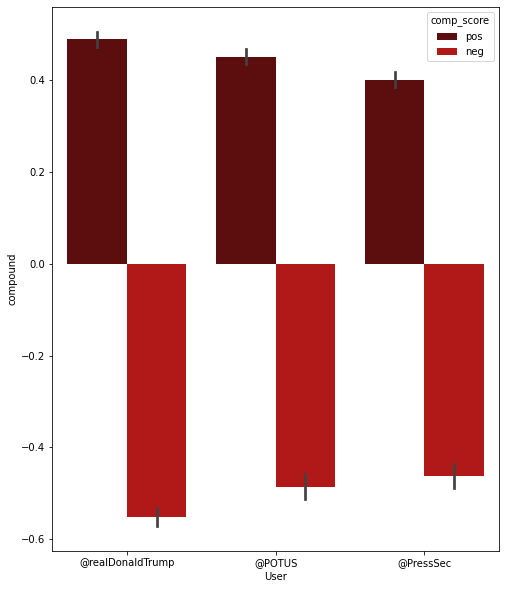

In [ ]:
#palette=np.array(palette)[ranks] ? to lable bars
sns.set_palette('hot')
plt.figure(figsize= (8, 10))

sns.barplot(x = 'User', y= 'compound',
          hue='comp_score', data=df);          

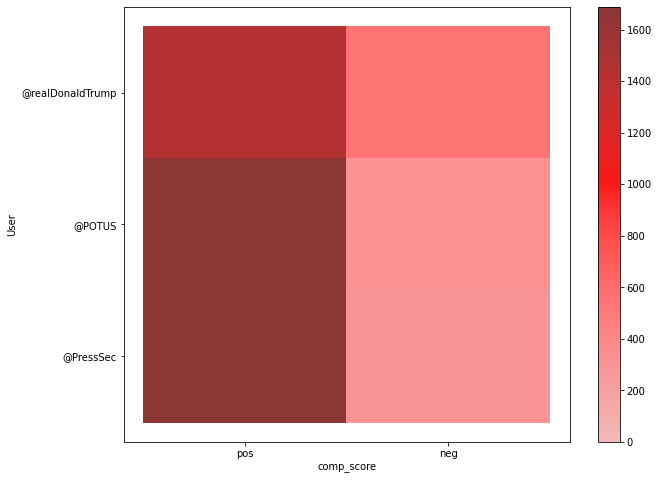

In [ ]:
#sns.set_palette('Oranges_r')
plt.figure(figsize= (10, 8))

sns.histplot(x='comp_score', y='User', cbar=True, data=df);

In [ ]:
df.head(2)

,User,Tweets,Link to Tweet,Date/Time,scores,compound,comp_score
0,@realDonaldTrump,"JOBS, JOBS, JOBS! https://t.co/wAkQMKdPXA",http://twitter.com/realDonaldTrump/status/8416...,"March 14, 2017 at 11:00AM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
1,@realDonaldTrump,Great optimism in America – and the results wi...,http://twitter.com/realDonaldTrump/status/8416...,"March 14, 2017 at 12:12PM","{'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'comp...",0.8955,pos


Messing with various visualizations and color palettes.

In [ ]:
#sns.set_palette('Oranges')

#sns.histplot(x='User', y = 'compound', hue = 'comp_score', data=df);

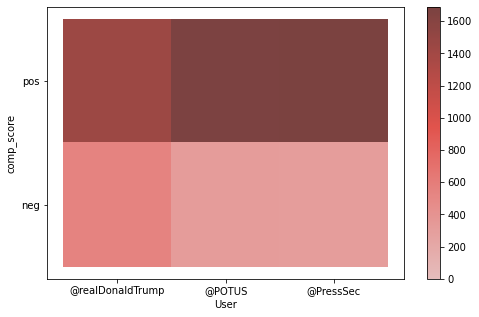

In [ ]:
#bivariate--x and y values looks like a heatmap
#add the parameter cbar to get the range of values
sns.set_palette("Spectral")
plt.figure(figsize = (8, 5))
sns.histplot(x='User', y='comp_score', cbar=True, data=df);

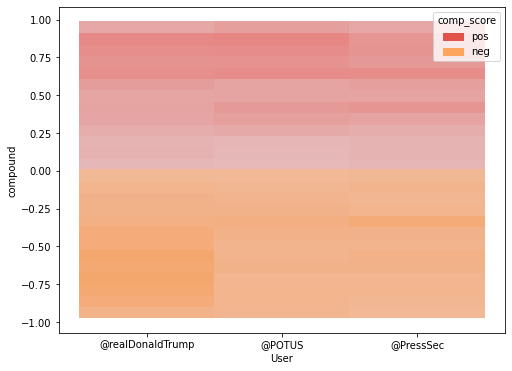

In [ ]:
sns.set_palette("Spectral")

plt.figure(figsize=(8, 6))
sns.histplot(x='User', y= 'compound', hue = 'comp_score', data=df);


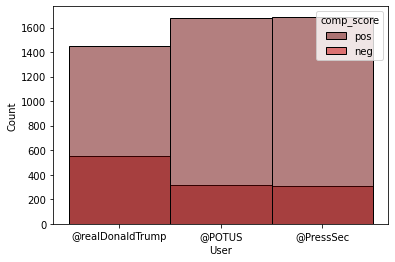

In [ ]:
sns.histplot(x='User', hue='comp_score', data=df);

- adding the shrink arg gives you space between the bars.
- also using the palette arg to change the color of the plot

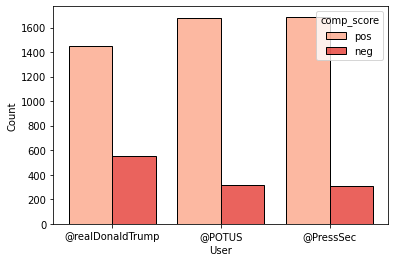

In [ ]:
sns.histplot(x='User', hue='comp_score', multiple='dodge', palette='Reds',
             data=df, shrink=0.8); 

In [ ]:
df['comp_score'].value_counts()

pos    4818
neg    1179
Name: comp_score, dtype: int64

In [ ]:
drumpf['compound'].mean()

0.20249574787393695

In [ ]:
drumpf['compound'].median()

0.3182

isolate trump's tweets and then visualize separately. use .iloc

In [ ]:
#ex: NL_batting98_2008 = AL_NLbatting98_2008.iloc[(AL_NLbatting98_2008['League']== "NL").values]
drumpf = df.iloc[(df['User']== "@realDonaldTrump").values]
drumpf.head()

,User,Tweets,Link to Tweet,Date/Time,scores,compound,comp_score
0,@realDonaldTrump,"JOBS, JOBS, JOBS! https://t.co/wAkQMKdPXA",http://twitter.com/realDonaldTrump/status/8416...,"March 14, 2017 at 11:00AM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
1,@realDonaldTrump,Great optimism in America – and the results wi...,http://twitter.com/realDonaldTrump/status/8416...,"March 14, 2017 at 12:12PM","{'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'comp...",0.8955,pos
2,@realDonaldTrump,"Does anybody really believe that a reporter, w...",http://twitter.com/realDonaldTrump/status/8419...,"March 15, 2017 at 06:55AM","{'neg': 0.158, 'neu': 0.842, 'pos': 0.0, 'comp...",-0.6280,neg
3,@realDonaldTrump,Can you imagine what the outcry would be if @S...,http://twitter.com/realDonaldTrump/status/8419...,"March 15, 2017 at 07:02AM","{'neg': 0.38, 'neu': 0.62, 'pos': 0.0, 'compou...",-0.9168,neg
4,@realDonaldTrump,"Will be going to Detroit, Michigan (love), tod...",http://twitter.com/realDonaldTrump/status/8419...,"March 15, 2017 at 07:13AM","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos


In [ ]:
drumpf['comp_score'].value_counts()

pos    1449
neg     550
Name: comp_score, dtype: int64

Hmmm...He's more negative/hateful...which makes me think that Vader isn't the best (?) at analyzing sentiment. I don't know...

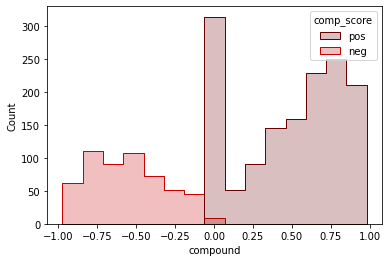

In [ ]:
sns.histplot(x='compound', hue='comp_score', element='step',data=drumpf);

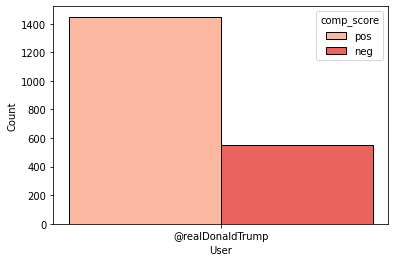

In [ ]:
sns.histplot(x='User', hue='comp_score', multiple='dodge', palette='Reds',
             data=drumpf, shrink=0.8); 

I guess I was surprised at what was found. I didn't expect more positive sentiments, at. all. I lived through that administration and the levels of negativity from speeches, to tweets, to press sec q&a...so much more negative than what was captured on Twitter. This analysis also doesn't capture lies & misinformation in his tweets. I'll have to think on this some more. This was a interesting exercise nonetheless.